In [132]:
import numpy as np
import pandas as pd
import csv
import math
from sklearn.metrics import confusion_matrix

HumanObsData = pd.read_csv("HumanObserved-Features-Data.csv")
HumanObsData = HumanObsData.drop(HumanObsData.columns[0], axis=1)
HumanObsData.head()

matrix = []
for i in range(HumanObsData.shape[0]):
    l = []
    for j in range(1,HumanObsData.shape[1]):
        l.append(HumanObsData.iloc[i][j])
    matrix.append([HumanObsData.iloc[i][0],l])
    
'''Make a dictionary (HOD_mydict) where the ‘key’ would be the image id and ‘value’ would be             
the feature vector for that particular image id.'''
HOD_mydict = {}
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        key = matrix[i][0]
        value = matrix[i][1]
        HOD_mydict[key] = value


In [133]:
Diff = pd.read_csv("HOD_diffn_pairs.csv")
Same = pd.read_csv("HOD_same_pairs.csv")

'''Since the number of different pairs (293,032) is way more than what we have in same pairs (791), 
we consider a sample of images where the number of images chosen are equal to the number of same pairs i.e. 791.'''
Diff_size = Same.shape[0]

Diff_sample = Diff.sample(Diff_size)

# Processing for Concatenation

In [134]:

lo = list(HumanObsData.columns.values) '''To have the header values'''

same_copy = Same
diff_copy = Diff_sample

same_diff_concat = same_copy.append(diff_copy)

final_HOD_concat_dataset = same_diff_concat

'''Rearranging the columns'''
header_list = ['img_id_A','img_id_B','target','fa1','fa2','fa3','fa4','fa5','fa6','fa7','fa8','fa9','fb1','fb2','fb3','fb4','fb5','fb6','fb7','fb8','fb9']
final_HOD_concat_dataset = final_HOD_concat_dataset.reindex(columns = header_list) 

'''Code to generate a concatenated features dataframe'''
m = 0
for i in range(same_diff_concat.shape[0]):
    f1 = HOD_mydict.get(same_diff_concat.iloc[i][0])
    f2 = HOD_mydict.get(same_diff_concat.iloc[i][1])
    f3 = f1 + f2
    for k in range(3, 21):
        final_HOD_concat_dataset.iat[i,k] = f3[m] 
        m += 1
    m = 0
    

In [135]:
final_HOD_concat_dataset.head()

,img_id_A,img_id_B,target,fa1,fa2,fa3,fa4,fa5,fa6,fa7,...,fa9,fb1,fb2,fb3,fb4,fb5,fb6,fb7,fb8,fb9
0,0359a,0359b,1,2.0,1.0,1.0,0.0,2.0,2.0,0.0,...,2.0,3.0,2.0,1.0,0.0,2.0,2.0,3.0,0.0,2.0
1,0577a,0577b,1,2.0,1.0,1.0,0.0,2.0,2.0,0.0,...,2.0,2.0,1.0,0.0,3.0,2.0,2.0,1.0,2.0,2.0
2,0577a,0577c,1,2.0,1.0,1.0,0.0,2.0,2.0,0.0,...,2.0,1.0,1.0,1.0,1.0,2.0,3.0,0.0,0.0,2.0
3,1120a,1120b,1,2.0,1.0,1.0,3.0,2.0,2.0,0.0,...,2.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0
4,1120a,1120c,1,2.0,1.0,1.0,3.0,2.0,2.0,0.0,...,2.0,2.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,2.0


# Generating the Concatenated Features Dataset

In [136]:
'''Randomly shuffling the data points in the concatenated dataset'''
final_HOD_concat_dataset = final_HOD_concat_dataset.sample(final_HOD_concat_dataset.shape[0]) 

'''Rearranging the columns'''
final_HOD_concat_dataset = final_HOD_concat_dataset[['img_id_A','img_id_B','fa1','fa2','fa3','fa4','fa5','fa6','fa7','fa8','fa9','fb1','fb2','fb3','fb4','fb5','fb6','fb7','fb8','fb9','target']]

'''Generating Concatenated Features Dataset for Logistic Regression'''
final_HOD_concat_dataset_logi = final_HOD_concat_dataset
final_HOD_concat_dataset_logi = final_HOD_concat_dataset_logi.drop(['img_id_A','img_id_B'], axis=1)
final_HOD_concat_dataset_logi.to_csv("HOD_concat_dataset_logi.csv", index=False)

'''Storing to csv files'''
final_HOD_concat_dataset_f = final_HOD_concat_dataset
final_HOD_concat_dataset_t = final_HOD_concat_dataset

final_HOD_concat_dataset_f = final_HOD_concat_dataset_f.drop(['img_id_A','img_id_B','target'], axis=1) 
final_HOD_concat_dataset_t = final_HOD_concat_dataset_t.drop(['img_id_A','img_id_B','fa1','fa2','fa3','fa4','fa5','fa6','fa7','fa8','fa9','fb1','fb2','fb3','fb4','fb5','fb6','fb7','fb8','fb9'], axis=1)

'''HOD_concat_dataset_f.csv stores all the features whereas final_HOD_concat_dataset_t.csv stores the target values'''
final_HOD_concat_dataset_f.to_csv("HOD_concat_dataset_f.csv", index=False, header=False)
final_HOD_concat_dataset_t.to_csv("HOD_concat_dataset_t.csv", index=False, header=False)


# Generating the Subtracted Feature Dataset

In [137]:

final_HOD_sub_dataset = same_diff_concat
header_list1 = ['img_id_A','img_id_B','target','fab1','fab2','fab3','fab4','fab5','fab6','fab7','fab8','fab9']
final_HOD_sub_dataset = final_HOD_sub_dataset.reindex(columns = header_list1)

m = 0
for i in range(same_diff_concat.shape[0]):
    f1 = HOD_mydict.get(same_diff_concat.iloc[i][0])
    f2 = HOD_mydict.get(same_diff_concat.iloc[i][1])
    f3 = list(np.abs(np.array(f1) - np.array(f2))) '''Considering absolute values'''
    for k in range(3, 12):
        final_HOD_sub_dataset.iat[i,k] = f3[m]
        m += 1
    m = 0

final_HOD_sub_dataset = final_HOD_sub_dataset.sample(final_HOD_sub_dataset.shape[0]) #Randomize
final_HOD_sub_dataset = final_HOD_sub_dataset[['img_id_A','img_id_B','fab1','fab2','fab3','fab4','fab5','fab6','fab7','fab8','fab9','target']]

'''Generating Subtracted Features Dataset for Logistic Regression'''
final_HOD_sub_dataset_logi = final_HOD_sub_dataset
final_HOD_sub_dataset_logi = final_HOD_sub_dataset_logi.drop(['img_id_A','img_id_B'], axis=1)
final_HOD_sub_dataset_logi.to_csv("HOD_sub_dataset_logi.csv", index=False)

'''Storing to csv files'''
final_HOD_sub_dataset_f = final_HOD_sub_dataset
final_HOD_sub_dataset_t = final_HOD_sub_dataset

final_HOD_sub_dataset_f = final_HOD_sub_dataset_f.drop(['img_id_A','img_id_B','target'], axis=1) 
final_HOD_sub_dataset_t = final_HOD_sub_dataset_t.drop(['img_id_A','img_id_B','fab1','fab2','fab3','fab4','fab5','fab6','fab7','fab8','fab9'], axis=1)


final_HOD_sub_dataset_f.to_csv("HOD_sub_dataset_f.csv", index=False, header=False)
final_HOD_sub_dataset_t.to_csv("HOD_sub_dataset_t.csv", index=False, header=False)


In [138]:
'''Linear Regression using Basis function'''

TrainingPercent = 80
ValidationPercent = 10
TestPercent = 10
'''Number of basis functions '''
M = 10
PHI = []

def GetTargetVector(filePath):
    t = []
    with open(filePath, 'rU') as f:
        reader = csv.reader(f)
        for row in reader:  
            t.append(int(row[0]))
    return t

def GenerateRawData(filePath):    
    dataMatrix = [] 
    with open(filePath, 'rU') as fi:
        reader = csv.reader(fi)
        for row in reader:
            dataRow = []
            for column in row:
                dataRow.append(float(column))
            dataMatrix.append(dataRow)   
    dataMatrix = np.transpose(dataMatrix)     
    return dataMatrix

def GenerateTrainingTarget(rawTraining,TrainingPercent = 80):
    TrainingLen = int(math.ceil(len(rawTraining)*(TrainingPercent*0.01)))
    t = rawTraining[:TrainingLen]
    return t

def GenerateTrainingDataMatrix(rawData, TrainingPercent = 80):
    T_len = int(math.ceil(len(rawData[0])*0.01*TrainingPercent))
    d2 = rawData[:,0:T_len]
    return d2

def GenerateValData(rawData, ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData[0])*ValPercent*0.01))
    V_End = TrainingCount + valSize
    dataMatrix = rawData[:,TrainingCount+1:V_End]
    return dataMatrix

def GenerateValTargetVector(rawData, ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData)*ValPercent*0.01))
    V_End = TrainingCount + valSize
    t = rawData[TrainingCount+1:V_End]
    return t

def GenerateBigSigma(Data, MuMatrix,TrainingPercent):
    BigSigma = np.zeros((len(Data),len(Data)))
    DataT = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))  
    varVect = []
    for i in range(0,len(DataT[0])):
        vct = []
        for j in range(0,int(TrainingLen)):
            vct.append(Data[i][j])    
        varVect.append(np.var(vct))
    for j in range(len(Data)):
        BigSigma[j][j] = varVect[j]
    BigSigma = np.dot(200,BigSigma)
    return BigSigma

def GetScalar(DataRow,MuRow, BigSigInv):  
    R = np.subtract(DataRow,MuRow)
    T = np.dot(BigSigInv,np.transpose(R)) 
    L = np.dot(R,T)
    return L

def GetRadialBasisOut(DataRow,MuRow, BigSigInv):    
    phi_x = math.exp(-0.5*GetScalar(DataRow,MuRow,BigSigInv))
    return phi_x

def GetPhiMatrix(Data, MuMatrix, BigSigma, TrainingPercent = 80):
    DataT = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))         
    PHI = np.zeros((int(TrainingLen),len(MuMatrix))) 
    BigSigInv = np.linalg.inv(BigSigma)
    for  C in range(0,len(MuMatrix)):
        for R in range(0,int(TrainingLen)):
            PHI[R][C] = GetRadialBasisOut(DataT[R], MuMatrix[C], BigSigInv)
    return PHI

def GetValTest(VAL_PHI,W):
    Y = np.dot(W,np.transpose(VAL_PHI))
    return Y

def GetErms(VAL_TEST_OUT,ValDataAct):
    sum = 0.0
    accuracy = 0.0
    counter = 0
    for i in range (0,len(VAL_TEST_OUT)):
        sum = sum + math.pow((ValDataAct[i] - VAL_TEST_OUT[i]),2)
        if(int(np.around(VAL_TEST_OUT[i], 0)) == ValDataAct[i]):
            counter+=1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    return (str(accuracy) + ',' +  str(math.sqrt(sum/len(VAL_TEST_OUT))))

# Fetching the Dataset

In [139]:
#Fetch input
a = input("Enter 1 for Human Observed Data, Concatenated Feature Setting\nEnter 2 for Human Observed Data, Subtracted Feature Setting\n")
if(a == str(1)):
    RawTarget = GetTargetVector('HOD_concat_dataset_t.csv')
    RawData   = GenerateRawData('HOD_concat_dataset_f.csv')
else:
    RawTarget = GetTargetVector('HOD_sub_dataset_t.csv')
    RawData   = GenerateRawData('HOD_sub_dataset_f.csv')

Enter 1 for Human Observed Data, Concatenated Feature Setting
Enter 2 for Human Observed Data, Subtracted Feature Setting
1


C:\Users\Sahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 'U' mode is deprecated
C:\Users\Sahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: 'U' mode is deprecated


# Partitioning the Dataset

In [140]:
'''Generating the TrainingTarget and TrainingData by performing partioning of the original dataset'''
TrainingTarget = np.array(GenerateTrainingTarget(RawTarget,TrainingPercent))
TrainingData   = GenerateTrainingDataMatrix(RawData,TrainingPercent)
print("Training Target: ",TrainingTarget.shape)
print("Training Data: ",TrainingData.shape)

(1266,)
(18, 1266)


In [141]:
'''Partitioning for Validation set'''
ValDataAct = np.array(GenerateValTargetVector(RawTarget,ValidationPercent, (len(TrainingTarget))))
ValData    = GenerateValData(RawData,ValidationPercent, (len(TrainingTarget)))
print("Validation Target: ",ValDataAct.shape)
print("Validation Data: ",ValData.shape)

(158,)
(18, 158)


In [142]:
'''Partitioning for test set'''
TestDataAct = np.array(GenerateValTargetVector(RawTarget,TestPercent, (len(TrainingTarget)+len(ValDataAct))))
TestData = GenerateValData(RawData,TestPercent, (len(TrainingTarget)+len(ValDataAct)))
print("Testing Target: ",TestDataAct.shape)
print("Testing Data: ",TestData.shape)

(157,)
(18, 157)


# Training Using SGD


In [143]:
ErmsArr = []
AccuracyArr = []
from sklearn.cluster import KMeans
'''We are doing kmeans clustering to find suitable number of cluster centroids. The cluster centroids would help us determine
the number of gaussian basis functions and their mean'''
kmeans = KMeans(n_clusters=M, random_state=0).fit(np.transpose(TrainingData))
Mu = kmeans.cluster_centers_

BigSigma     = GenerateBigSigma(RawData, Mu, TrainingPercent)
TRAINING_PHI = GetPhiMatrix(RawData, Mu, BigSigma, TrainingPercent)
TEST_PHI     = GetPhiMatrix(TestData, Mu, BigSigma, 100) 
VAL_PHI      = GetPhiMatrix(ValData, Mu, BigSigma, 100)

In [144]:
'''Initializing the weights with 0 in the beginning'''
W_Now = np.zeros(M)
La           = 0.8
learningRate = 0.001
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []

for i in range(1000):
    for i in range(0,1200):
    
        Delta_E_D = -np.dot((TrainingTarget[i] - np.dot(np.transpose(W_Now),TRAINING_PHI[i])),TRAINING_PHI[i])
        La_Delta_E_W = np.dot(La,W_Now)
        Delta_E = np.add(Delta_E_D,La_Delta_E_W)    
        Delta_W = -np.dot(learningRate,Delta_E)
        W_T_Next = W_Now + Delta_W
        W_Now = W_T_Next
    
        TR_TEST_OUT = GetValTest(TRAINING_PHI,W_T_Next) 
        Erms_TR = GetErms(TR_TEST_OUT,TrainingTarget)
        L_Erms_TR.append(float(Erms_TR.split(',')[1]))
    
        VAL_TEST_OUT = GetValTest(VAL_PHI,W_T_Next) 
        Erms_Val = GetErms(VAL_TEST_OUT,ValDataAct)
        L_Erms_Val.append(float(Erms_Val.split(',')[1]))
    
    TEST_OUT = GetValTest(TEST_PHI,W_T_Next) 
    Erms_Test = GetErms(TEST_OUT,TestDataAct)
    L_Erms_Test.append(float(Erms_Test.split(',')[1]))

In [145]:
print ('----------Gradient Descent Solution--------------------')
print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))

----------Gradient Descent Solution--------------------
E_rms Training   = 0.49921
E_rms Validation = 0.49748
E_rms Testing    = 0.49724


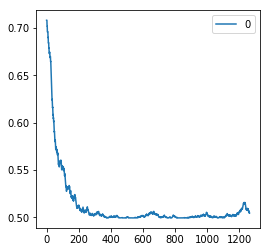

In [174]:
import matplotlib as plt

df = pd.DataFrame(L_Erms_TR)
pt = df.plot(figsize=(4,4))
pt

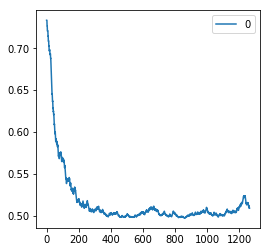

In [172]:
import matplotlib as plt

df = pd.DataFrame(L_Erms_Val)
pt = df.plot(figsize=(4,4))
pt

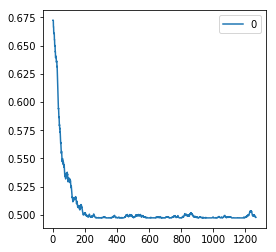

In [173]:
import matplotlib as plt

df = pd.DataFrame(L_Erms_Test)
pt = df.plot(figsize=(4,4))
pt

# Compute the Confusion Matrix

In [151]:
confusion_matrix(TrainingTarget,np.around(TR_TEST_OUT,0))

array([[86,  0],
       [71,  0]], dtype=int64)

In [ ]:
confusion_matrix(ValDataAct,np.around(VAL_TEST_OUT,0))

In [ ]:
confusion_matrix(TestDataAct,np.around(TEST_TEST_OUT,0))

In [161]:
'''Calculating the Precision Score, The precision is intuitively the ability of the classifier not to label 
as positive a sample that is negative. &  The recall is intuitively the ability of the classifier to find all the 
positive samples.
The best value is 1 and the worst value is 0 for both.'''
from sklearn.metrics import precision_score, recall_score
precision_score(TrainingTarget, TR_TEST_OUT.round(), average='binary') 

C:\Users\Sahil\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [ ]:
precision_score(ValDataAct, VAl_TEST_OUT.round(), average='binary') 
recall_score(ValDataAct, VAL_TEST_OUT.round(), average='binary') 

In [163]:
precision_score(TestDataAct, TEST_OUT.round(), average='binary') 
recall_score(TestDataAct, TEST_OUT.round(), average='binary')

C:\Users\Sahil\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0